## Importacion de Librerias y Carga de Datos

In [1]:
# importacion de librerias

import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("datasets/propiedades_scrapeadas_2025-09-08.csv")

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Servicio,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Superficie Balcones,Propiedad Horizontal,Seguridad,Piscina,Gastos Comúnes,Altura,Aptos por piso,Disposición,Muebles,Patio,Pisos Edificio,Lavadero,Piso
0,https://www.casasymas.com.uy/propiedad/169046-...,U$S 248.000Venta,3,2.0,255 m²,90m²,255m²,Dormitorios de Servicio: 2,Dormitorios en Suite: 1,Cochera: 1,Parrillero,Hogar,Oeste,1.0,Cocina Definida,1923.0,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/183266-...,U$S 850.000Venta,4,3.0,429 m²,256m²,429m²,Dormitorios de Servicio: 1,Dormitorios en Suite: 1,Garaje: 4,NaN,NaN,NaN,NaN,Cocina Definida,2005.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/190147-...,U$S 298.000Venta,3,3.0,230 m²,177m²,230m²,NaN,NaN,Garaje: 1,Parrillero,Hogar,NaN,2.0,Cocina Definida,1958.0,Jardín,NaN,40m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/940-cas...,U$S 380.000Venta,3,3.0,130 m²,130m²,150m²,NaN,Dormitorios en Suite: 1,Cochera: 1,Parrillero,losa radiante,Norte,2.0,Cocina Integrada,2024.0,Jardín,Acepta Mascotas,20m²,Propiedad Horizontal,virtual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/165019-...,U$S 685.000Venta,4,5.0,289 m²,268m²,811m²,NaN,Dormitorios en Suite: 2,Cochera: 2,Parrillero,Radiadores,Este,2.0,Cocina Definida,1979.0,Jardín,NaN,NaN,NaN,NaN,Piscina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1934 non-null   object 
 1   precio                 1934 non-null   object 
 2   Dormitorios            1934 non-null   object 
 3   Baños                  1862 non-null   float64
 4   Superficie             1743 non-null   object 
 5   Superficie Construida  1785 non-null   object 
 6   Superficie Terreno     1559 non-null   object 
 7   Dormitorios Servicio   377 non-null    object 
 8   Dormitorios Suite      456 non-null    object 
 9   Garage                 1269 non-null   object 
 10  Parrillero             445 non-null    object 
 11  Calefacción            222 non-null    object 
 12  Orientación            876 non-null    object 
 13  Plantas                572 non-null    float64
 14  Cocina                 1411 non-null   object 
 15  Año 

# Limpieza de datos

## Eliminamos duplicados del dataset

In [5]:
# vemos los duplicados que hay en el dataset 

duplicados = df.duplicated()
print(f'Duplicados encontrados: {duplicados.sum()}')

Duplicados encontrados: 679


In [6]:
# dropeamos los duplicados del dataset por url 

df = df.drop_duplicates(subset='url')

## DROP DE COLUMNAS -- CRITERIO 

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial. 

In [7]:
# Calcular el número de valores no nulos por columna
non_null_counts = df.notnull().sum()

# Identificar las columnas a eliminar (non-null count < 650)
columns_to_drop = non_null_counts[non_null_counts < 650].index

# Eliminar las columnas identificadas
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
print("Columnas restantes:", df.columns)

Columnas restantes: Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Garage', 'Cocina',
       'Año de Construcción'],
      dtype='object')


In [8]:
print(columns_to_drop)

Index(['Dormitorios Servicio', 'Dormitorios Suite', 'Parrillero',
       'Calefacción', 'Orientación', 'Plantas', 'Jardín', 'Acepta Mascotas',
       'Superficie Balcones', 'Propiedad Horizontal', 'Seguridad', 'Piscina',
       'Gastos Comúnes', 'Altura', 'Aptos por piso', 'Disposición', 'Muebles',
       'Patio', 'Pisos Edificio', 'Lavadero', 'Piso'],
      dtype='object')


In [9]:
df.head()

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Cocina,Año de Construcción
0,https://www.casasymas.com.uy/propiedad/169046-...,U$S 248.000Venta,3,2.0,255 m²,90m²,255m²,Cochera: 1,Cocina Definida,1923.0
1,https://www.casasymas.com.uy/propiedad/183266-...,U$S 850.000Venta,4,3.0,429 m²,256m²,429m²,Garaje: 4,Cocina Definida,2005.0
2,https://www.casasymas.com.uy/propiedad/190147-...,U$S 298.000Venta,3,3.0,230 m²,177m²,230m²,Garaje: 1,Cocina Definida,1958.0
3,https://www.casasymas.com.uy/propiedad/940-cas...,U$S 380.000Venta,3,3.0,130 m²,130m²,150m²,Cochera: 1,Cocina Integrada,2024.0
4,https://www.casasymas.com.uy/propiedad/165019-...,U$S 685.000Venta,4,5.0,289 m²,268m²,811m²,Cochera: 2,Cocina Definida,1979.0


In [10]:
df = df.drop(columns=['Dormitorios Suite', 'Orientación', 'Cocina', 'Año de Construcción', 'Disposición'], errors='ignore')

In [11]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'superficie_construida' y 'superficie_terreno'

# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno', 'Superficie']].isnull().any(axis=1)]

# print(filas_con_nan.value_counts())

# Mostrar las filas con NaN
print(filas_con_nan)

                                                    url              precio  \
7     https://www.casasymas.com.uy/propiedad/117530-...  U$S 1.500.000Venta   
10    https://www.casasymas.com.uy/propiedad/186448-...    U$S 695.000Venta   
17    https://www.casasymas.com.uy/propiedad/169340-...    U$S 280.000Venta   
19    https://www.casasymas.com.uy/propiedad/90237-c...    U$S 203.400Venta   
20    https://www.casasymas.com.uy/propiedad/165774-...  U$S 2.900.000Venta   
...                                                 ...                 ...   
1879  https://www.casasymas.com.uy/propiedad/194975-...    U$S 205.000Venta   
1898  https://www.casasymas.com.uy/propiedad/181831-...    U$S 770.000Venta   
1903  https://www.casasymas.com.uy/propiedad/120273-...     U$S 55.000Venta   
1907  https://www.casasymas.com.uy/propiedad/151209-...     U$S 85.000Venta   
1917  https://www.casasymas.com.uy/propiedad/191947-...    U$S 770.000Venta   

     Dormitorios  Baños Superficie Superficie Const

## Registros fuera de criterios

Criterios: 

* Dormitorios: no mas de 10
* Baños: no mas de 5
* Garage: no mas de 5

In [12]:
df.head()

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage
0,https://www.casasymas.com.uy/propiedad/169046-...,U$S 248.000Venta,3,2.0,255 m²,90m²,255m²,Cochera: 1
1,https://www.casasymas.com.uy/propiedad/183266-...,U$S 850.000Venta,4,3.0,429 m²,256m²,429m²,Garaje: 4
2,https://www.casasymas.com.uy/propiedad/190147-...,U$S 298.000Venta,3,3.0,230 m²,177m²,230m²,Garaje: 1
3,https://www.casasymas.com.uy/propiedad/940-cas...,U$S 380.000Venta,3,3.0,130 m²,130m²,150m²,Cochera: 1
4,https://www.casasymas.com.uy/propiedad/165019-...,U$S 685.000Venta,4,5.0,289 m²,268m²,811m²,Cochera: 2


In [13]:
# Convert columns to numeric, replacing errors with NaN
df['Dormitorios'] = pd.to_numeric(df['Dormitorios'], errors='coerce')
df['Garage'] = pd.to_numeric(df['Garage'], errors='coerce')

# Now you can filter
filtered_data = df[(df['Dormitorios'] > 10) | (df['Baños'] > 5) | (df['Garage'] > 5)]

print(f"Cantidad de filas a sacar: {len(filtered_data)}")

Cantidad de filas a sacar: 65


In [14]:
# Identificamos las filas a eliminar (las que tienen valores extremos)
rows_to_drop = df[(df['Dormitorios'] >= 10) | (df['Baños'] >= 5) | (df['Garage'] >= 5)].index

print(f"Filas a eliminar: {len(rows_to_drop)}")

# Eliminamos esas filas
df = df.drop(rows_to_drop)

print(f"Filas restantes: {len(df)}")
df.head(5)

Filas a eliminar: 146
Filas restantes: 1109


,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage
0,https://www.casasymas.com.uy/propiedad/169046-...,U$S 248.000Venta,3.0,2.0,255 m²,90m²,255m²,NaN
1,https://www.casasymas.com.uy/propiedad/183266-...,U$S 850.000Venta,4.0,3.0,429 m²,256m²,429m²,NaN
2,https://www.casasymas.com.uy/propiedad/190147-...,U$S 298.000Venta,3.0,3.0,230 m²,177m²,230m²,NaN
3,https://www.casasymas.com.uy/propiedad/940-cas...,U$S 380.000Venta,3.0,3.0,130 m²,130m²,150m²,NaN
5,https://www.casasymas.com.uy/propiedad/159162-...,U$S 119.000Venta,2.0,1.0,380 m²,62m²,380m²,NaN


## Limpieza de campos 

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis. 

In [15]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0    248000.0
1    850000.0
2    298000.0
3    380000.0
5    119000.0
Name: precio, dtype: float64


In [16]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0. 

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

df = df.drop(columns=['Dormitorios'])

In [17]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero 

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [18]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero 

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [19]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie'] = df["Superficie"].str.strip()

# convertir a numero 

df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [20]:
# reemplazar en garage los NaN por 0

# Reemplazar vacíos o NaN por 0
df['Garage'] = df['Garage'].fillna(0)

# Extraer solo el número
df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Garage'] = df['Garage'].fillna(0).astype(int)

<>:7: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:7: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
/var/folders/jb/mrvrxpj536q3c07jmkq2z00c0000gn/T/ipykernel_7270/4221029522.py:7: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')


In [21]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [22]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio


In [23]:
# eliminar chacras del dataset 

rows_to_drop = df[df['Superficie Terreno'] > 20000].index

df = df.drop(rows_to_drop)

df.head(10)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/169046-...,248000.0,2.0,255.0,90.0,255.0,0,3.0
1,https://www.casasymas.com.uy/propiedad/183266-...,850000.0,3.0,429.0,256.0,429.0,0,4.0
2,https://www.casasymas.com.uy/propiedad/190147-...,298000.0,3.0,230.0,177.0,230.0,0,3.0
3,https://www.casasymas.com.uy/propiedad/940-cas...,380000.0,3.0,130.0,130.0,150.0,0,3.0
5,https://www.casasymas.com.uy/propiedad/159162-...,119000.0,1.0,380.0,62.0,380.0,0,2.0
6,https://www.casasymas.com.uy/propiedad/133140-...,1780000.0,4.0,263.0,263.0,1316.0,0,3.0
8,https://www.casasymas.com.uy/propiedad/205399-...,370000.0,3.0,497.0,195.0,497.0,0,3.0
9,https://www.casasymas.com.uy/propiedad/204883-...,380000.0,2.0,250.0,180.0,250.0,0,4.0
10,https://www.casasymas.com.uy/propiedad/186448-...,695000.0,4.0,NaN,249.0,321.0,0,4.0
11,https://www.casasymas.com.uy/propiedad/186450-...,380000.0,3.0,130.0,110.0,20.0,0,3.0


## AGREGAR BARRIOS 

In [24]:
barrios = {
    "aguada": "B",
    "aires-puros": "C", 
    "atahualpa": "C", 
    "banados-de-carrasco": "F", 
    "barrio-sur": "B", 
    "belvedere": "A",
    "brazo-oriental": "C", 
    "buceo": "CH", 
    "bella-vista": "C", 
    "capurro": "C", 
    "carrasco": "E", 
    "carrasco-norte": "E", 
    "casabo": "A", 
    "pajas-blancas": "A", 
    "casavalle": "D", 
    "castro": "D", 
    "perez-castellanos": "D", 
    "centro": "B", 
    "cerrito": "D",
    "cerro": "A", 
    "ciudad-vieja": "B", 
    "colon": "G", 
    "conciliacion": "G", 
    "cordon": "B", 
    "abayuba": "G", 
    "flor-de-maronas": "F", 
    "ituzaingo": "F", 
    "jacinto-vera": "C", 
    "jardines-del-hipodromo": "F", 
    "la-paloma": "A", 
    "la-teja": "A", 
    "larranaga": "C", 
    "las-acacias": "D", 
    "las-canteras": "E", 
    "lezica": "G", 
    "melilla": "G", 
    "malvin": "E", 
    "malvin-norte": "E", 
    "paso-de-las-duranas": "G",
    "manga": "F", 
    "toledo-chico": "D", 
    "maronas": "F", 
    "parque-guarani": "F",
    "mercado-modelo": "C", 
    "bolivar": "C", 
    "nuevo-paris": "A", 
    "palermo": "B", 
    "parque-batlle": "CH", 
    "villa-dolores": "CH", 
    "parque-rodo": "B", 
    "paso-de-la-arena": "A", 
    "penarol": "G", 
    "lavalleja": "G", 
    "piedras-blancas": "D",
    "pocitos": "CH", 
    "prado": "A", 
    "nueva-savona": "A", 
    "punta-carretas": "CH", 
    "punta-gorda": "E", 
    "punta-rieles": "F", 
    "bella-italia": "F", 
    "reducto": "C", 
    "sayago": "G", 
    "tres-cruces": "B",  
    "tres-ombues": "A", 
    "victoria": "A",
    "union": "D", 
    "villa-espanola": "D", 
    "villa-garcia": "F", 
    "villa-munoz": "C", 
    "paso-molino": "A", 
    "la-comercial": "B",
    "san-nicolas": "E", 
    "goes": "C", 
    "parque-rivera": "E", 
    "la-blanqueada": "CH", 
    "la-figurita": "C"
}

barrios_sorted = sorted(barrios, key=len, reverse = True)

def extraer_barrios_de_url(url: str) -> str | None:
    for barrio in barrios_sorted:
        if barrio in url: 
            return barrio
    return None

df["barrio"] = df["url"].apply(extraer_barrios_de_url)
df["municipio"] = df["barrio"].map(barrios)


In [25]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 102


In [26]:
df = df.dropna(subset=["barrio"]).reset_index(drop=True)

In [27]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 0


## AGREGAR COLUMNA BARRIO 

In [28]:
barrios = df['url']

print(barrios)

0      https://www.casasymas.com.uy/propiedad/183266-...
1      https://www.casasymas.com.uy/propiedad/940-cas...
2      https://www.casasymas.com.uy/propiedad/159162-...
3      https://www.casasymas.com.uy/propiedad/133140-...
4      https://www.casasymas.com.uy/propiedad/205399-...
                             ...                        
994    https://www.casasymas.com.uy/propiedad/170075-...
995    https://www.casasymas.com.uy/propiedad/191947-...
996    https://www.casasymas.com.uy/propiedad/103224-...
997    https://www.casasymas.com.uy/propiedad/202384-...
998    https://www.casasymas.com.uy/propiedad/190421-...
Name: url, Length: 999, dtype: object


## Export dataset

In [29]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/183266-...,850000.0,3.0,429.0,256.0,429.0,0,4.0,carrasco,E
1,https://www.casasymas.com.uy/propiedad/940-cas...,380000.0,3.0,130.0,130.0,150.0,0,3.0,carrasco,E
2,https://www.casasymas.com.uy/propiedad/159162-...,119000.0,1.0,380.0,62.0,380.0,0,2.0,tres-cruces,B
3,https://www.casasymas.com.uy/propiedad/133140-...,1780000.0,4.0,263.0,263.0,1316.0,0,3.0,san-nicolas,E
4,https://www.casasymas.com.uy/propiedad/205399-...,370000.0,3.0,497.0,195.0,497.0,0,3.0,buceo,CH


# COMIENZA EDA

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
df.describe()

,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio
count,9.990000e+02,964.000000,905.000000,922.000000,791.000000,999.0,983.000000
mean,3.896775e+05,2.271784,303.228950,176.584599,389.823009,0.0,3.307223
std,3.272881e+05,0.985246,325.030096,112.941280,686.728046,0.0,1.152001
min,3.350000e+02,1.000000,10.000000,16.000000,6.000000,0.0,1.000000
25%,1.700000e+05,1.000000,125.000000,100.000000,122.000000,0.0,3.000000
50%,2.950000e+05,2.000000,209.000000,146.000000,248.000000,0.0,3.000000
75%,4.600000e+05,3.000000,362.000000,219.000000,486.000000,0.0,4.000000
max,2.250000e+06,4.000000,6000.000000,766.000000,8886.000000,0.0,9.000000


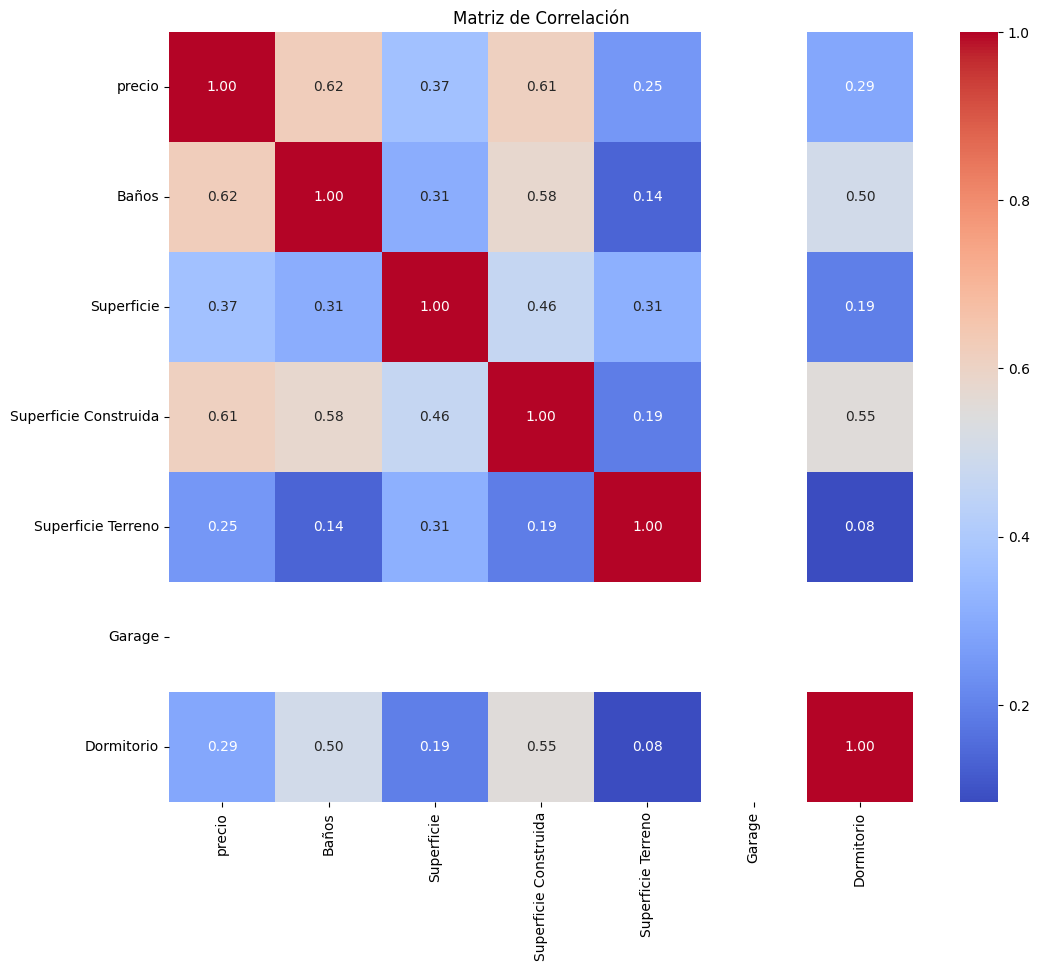

In [32]:
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Muestra el gráfico
plt.title('Matriz de Correlación')
plt.show()

## Boxplots

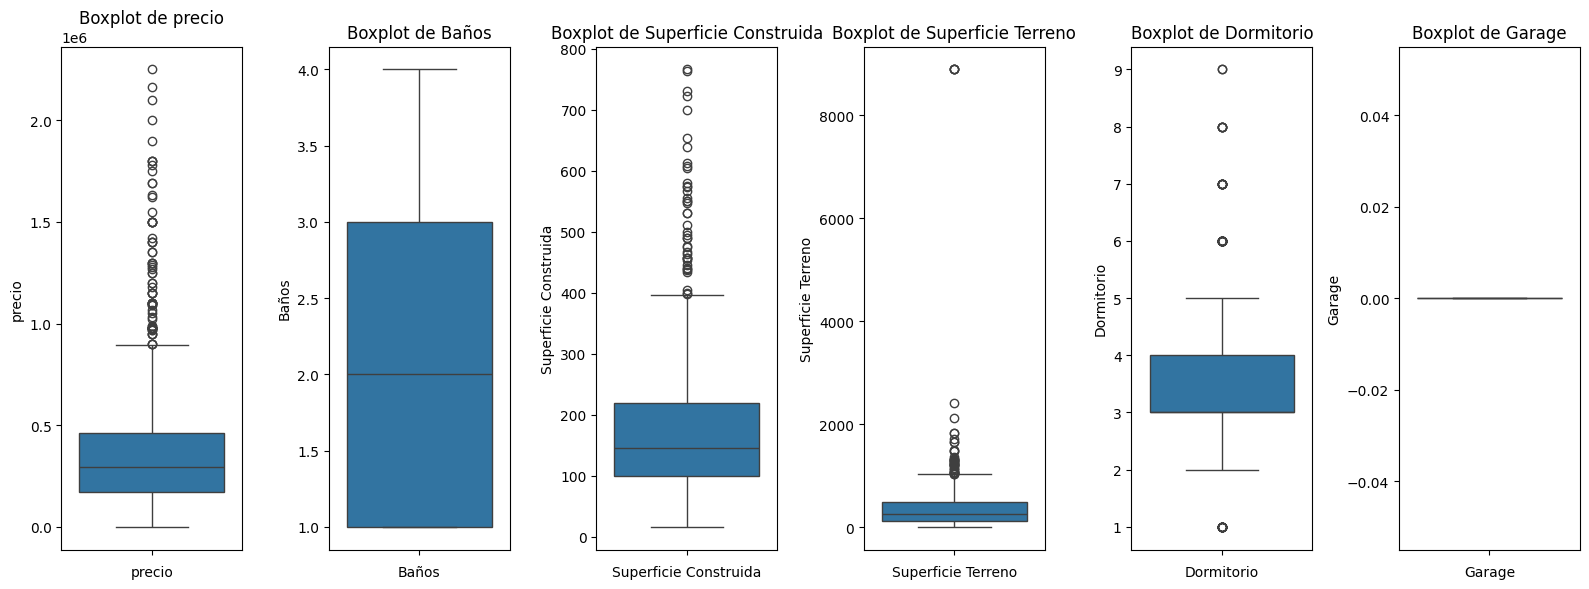

In [33]:
# Lista de las columnas que quieres graficar
columnas_interes = ['precio', 'Baños', 'Superficie Construida', 'Superficie Terreno', 'Dormitorio', 'Garage']

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(columnas_interes), figsize=(16, 6))

# Iterar sobre las columnas y los ejes para crear un boxplot para cada columna
for ax, col in zip(axes, columnas_interes):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

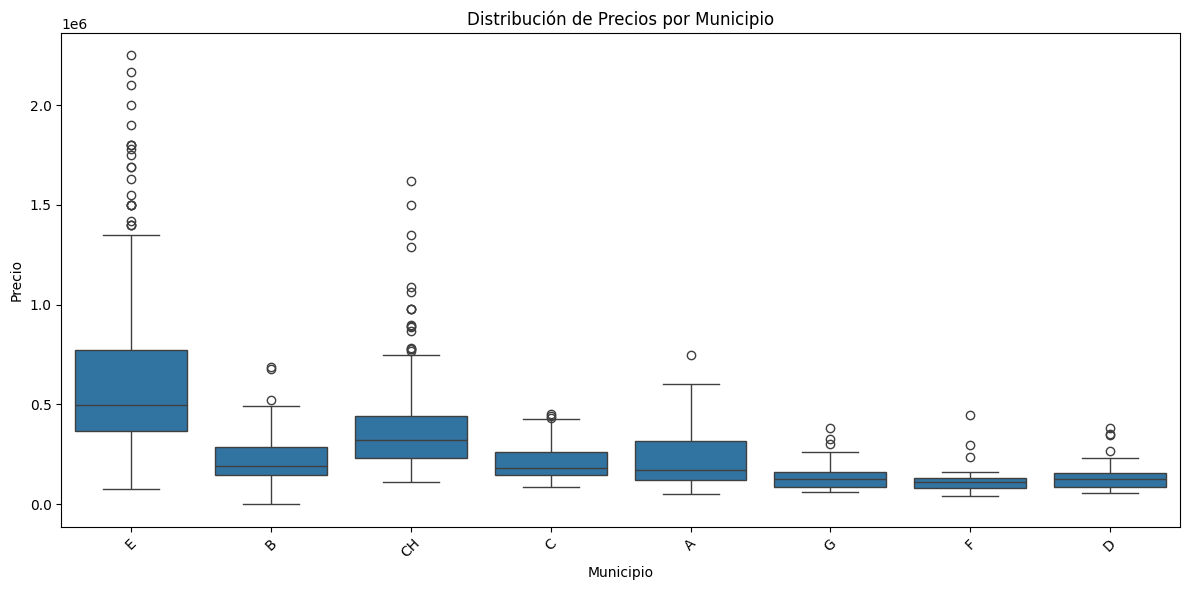

In [34]:
# Asegúrate de que 'df' tiene las columnas 'municipio' y 'precio'
# Aquí 'precio' es la columna que contiene los precios que quieres graficar

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='municipio', y='precio', data=df)

# Añadir título y etiquetas
plt.title('Distribución de Precios por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son largas
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

## Cantidad de datos por municipio

In [35]:
# Asegúrate de que 'df' es tu DataFrame y 'municipio' es la columna que contiene los municipios
cantidad_por_municipio = df['municipio'].value_counts()

# Mostrar la cantidad de datos por municipio
print(cantidad_por_municipio)

municipio
E     369
CH    201
B     124
A     101
C      94
G      50
D      37
F      23
Name: count, dtype: int64


## Precio m2

basado en superficie contruida y en superficie terreno.

In [36]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/183266-...,850000.0,3.0,429.0,256.0,429.0,0,4.0,carrasco,E
1,https://www.casasymas.com.uy/propiedad/940-cas...,380000.0,3.0,130.0,130.0,150.0,0,3.0,carrasco,E
2,https://www.casasymas.com.uy/propiedad/159162-...,119000.0,1.0,380.0,62.0,380.0,0,2.0,tres-cruces,B
3,https://www.casasymas.com.uy/propiedad/133140-...,1780000.0,4.0,263.0,263.0,1316.0,0,3.0,san-nicolas,E
4,https://www.casasymas.com.uy/propiedad/205399-...,370000.0,3.0,497.0,195.0,497.0,0,3.0,buceo,CH


In [37]:
# Asegúrate de que 'df' tiene las columnas 'precio', 'superficie_construida' y 'superficie_terreno'

# Calcular el precio por metro cuadrado basado en la superficie construida
df['precio_por_m2_construido'] = df['precio'] / df['Superficie Construida']

# Calcular el precio por metro cuadrado basado en la superficie del terreno
df['precio_por_m2_terreno'] = df['precio'] / df['Superficie Terreno']

df['precio_por_m2'] = df['precio'] / df['Superficie']

# Mostrar las nuevas columnas
print(df[['precio', 'Superficie Construida', 'precio_por_m2_construido', 'Superficie Terreno', 'precio_por_m2_terreno']])

        precio  Superficie Construida  precio_por_m2_construido  \
0     850000.0                  256.0               3320.312500   
1     380000.0                  130.0               2923.076923   
2     119000.0                   62.0               1919.354839   
3    1780000.0                  263.0               6768.060837   
4     370000.0                  195.0               1897.435897   
..         ...                    ...                       ...   
994   320000.0                  100.0               3200.000000   
995   770000.0                  300.0               2566.666667   
996    95000.0                   70.0               1357.142857   
997   259000.0                   76.0               3407.894737   
998   160000.0                  146.0               1095.890411   

     Superficie Terreno  precio_por_m2_terreno  
0                 429.0            1981.351981  
1                 150.0            2533.333333  
2                 380.0             313.157895  

In [38]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'superficie_construida' y 'superficie_terreno'

# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno']].isnull().any(axis=1)]

# Mostrar las filas con NaN
print(filas_con_nan)

                                                   url    precio  Baños  \
11   https://www.casasymas.com.uy/propiedad/169340-...  280000.0    2.0   
13   https://www.casasymas.com.uy/propiedad/90237-c...  203400.0    2.0   
29   https://www.casasymas.com.uy/propiedad/200968-...  695000.0    3.0   
31   https://www.casasymas.com.uy/propiedad/194470-...  267000.0    3.0   
32   https://www.casasymas.com.uy/propiedad/206369-...  128000.0    2.0   
..                                                 ...       ...    ...   
979  https://www.casasymas.com.uy/propiedad/137357-...  388000.0    1.0   
981  https://www.casasymas.com.uy/propiedad/34846-c...  780000.0    3.0   
982  https://www.casasymas.com.uy/propiedad/194975-...  205000.0    1.0   
990  https://www.casasymas.com.uy/propiedad/120273-...   55000.0    1.0   
992  https://www.casasymas.com.uy/propiedad/151209-...   85000.0    1.0   

     Superficie  Superficie Construida  Superficie Terreno  Garage  \
11        148.0              

## Precio promedio por municipio

In [39]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio'

# Calcular el precio promedio por municipio
precio_promedio_por_municipio = df.groupby('municipio')['precio'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_municipio = pd.DataFrame({
    'precio_promedio': precio_promedio_por_municipio,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio
resultado_municipio = resultado_municipio.sort_values(by='precio_promedio', ascending=False)

# Mostrar el resultado
print(resultado_municipio)

           precio_promedio  cantidad_propiedades
municipio                                       
E            612099.574526                   369
CH           389487.562189                   201
B            226181.733871                   124
C            214053.191489                    94
A            212806.920792                   101
D            145056.756757                    37
G            142240.000000                    50
F            130256.739130                    23


In [40]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por municipio
precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2': precio_promedio_por_m2_construido,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2
resultado_m2_municipio = resultado_m2_municipio.sort_values(by='precio_promedio_por_m2', ascending=False)

# Mostrar el resultado
print(resultado_m2_municipio)

           precio_promedio_por_m2  cantidad_propiedades
municipio                                              
E                     3166.559764                   369
A                     2876.698822                   101
CH                    2409.905183                   201
C                     1543.116378                    94
B                     1448.159049                   124
D                     1344.464342                    37
G                     1194.828662                    50
F                     1187.961204                    23


In [41]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_terreno'

# Calcular el precio promedio por m2 terreno por municipio
precio_promedio_por_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_terreno_municipio = pd.DataFrame({
    'precio_promedio_por_m2_terreno': precio_promedio_por_m2_terreno,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2 terreno
resultado_m2_terreno_municipio = resultado_m2_terreno_municipio.sort_values(by='precio_promedio_por_m2_terreno', ascending=False)

# Mostrar el resultado
print(resultado_m2_terreno_municipio)

           precio_promedio_por_m2_terreno  cantidad_propiedades
municipio                                                      
CH                            4240.337224                   201
C                             2556.760150                    94
E                             2386.840864                   369
B                             2322.133973                   124
A                             1727.017671                   101
D                              723.975745                    37
G                              447.806142                    50
F                              318.194977                    23


## Lo mismo por barrios

In [42]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio'

# Calcular el precio promedio por barrio
precio_promedio_por_barrios = df.groupby('barrio')['precio'].mean()

# Calcular la cantidad de propiedades por barrio
cantidad_propiedades_por_barrio = df.groupby('barrio').size()

# Combinar ambos resultados en un DataFrame
resultado = pd.DataFrame({
    'precio_promedio': precio_promedio_por_barrios,
    'cantidad_propiedades': cantidad_propiedades_por_barrio
})

# Ordenar de mayor a menor por precio promedio
resultado = resultado.sort_values(by='precio_promedio', ascending=False)

# Mostrar el resultado sin decimales
print(resultado.round(0).astype(int))

                 precio_promedio  cantidad_propiedades
barrio                                                
san-nicolas              1184556                    18
carrasco                  735800                   165
punta-gorda               603135                    52
punta-carretas            602125                    24
villa-dolores             465000                     2
...                          ...                   ...
conciliacion               84917                     6
flor-de-maronas            78781                     5
las-acacias                73000                     1
nuevo-paris                69333                     3
tres-ombues                49000                     1

[63 rows x 2 columns]


In [43]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por barrio
precio_promedio_por_m2_construido_barrios = df.groupby('barrio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_construido_barrios = precio_promedio_por_m2_construido_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por barrio
print(precio_promedio_por_m2_construido_barrios)

barrio
san-nicolas      5410
prado            4472
carrasco         3422
carrasco-norte   3151
villa-dolores    2951
                 ... 
ituzaingo         757
nuevo-paris       646
ciudad-vieja      584
villa-garcia      410
tres-ombues       NaN
Name: precio_por_m2_construido, Length: 63, dtype: float64


In [44]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Calcular el precio promedio por metro cuadrado de terreno por barrio
precio_promedio_por_m2_terreno_barrios = df.groupby('barrio')['precio_por_m2_terreno'].mean()

# Ordenar de mayor a menor
precio_promedio_por_m2_terreno_barrios = precio_promedio_por_m2_terreno_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por metro cuadrado de terreno por barrio
print(precio_promedio_por_m2_terreno_barrios)

barrio
parque-batlle            9967
brazo-oriental           5470
tres-ombues              4900
punta-carretas           4552
pocitos                  4514
                         ... 
villa-garcia              219
pajas-blancas             205
jardines-del-hipodromo    157
punta-rieles              124
las-acacias               NaN
Name: precio_por_m2_terreno, Length: 63, dtype: float64


## Precio promedio por m2 construido, m2 terreno

In [45]:
df.head()

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/183266-...,850000,3,429,256,429,0,4,carrasco,E,3320,1981,1981
1,https://www.casasymas.com.uy/propiedad/940-cas...,380000,3,130,130,150,0,3,carrasco,E,2923,2533,2923
2,https://www.casasymas.com.uy/propiedad/159162-...,119000,1,380,62,380,0,2,tres-cruces,B,1919,313,313
3,https://www.casasymas.com.uy/propiedad/133140-...,1780000,4,263,263,1316,0,3,san-nicolas,E,6768,1353,6768
4,https://www.casasymas.com.uy/propiedad/205399-...,370000,3,497,195,497,0,3,buceo,CH,1897,744,744


In [46]:
# Configurar pandas para mostrar todos los datos sin cortar
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.0f}'.format)

# Crear la tabla directamente con groupby y agg
tabla_completa = df.groupby('barrio').agg({
    'precio_por_m2': 'mean',
    'precio_por_m2_construido': 'mean',
    'precio_por_m2_terreno': 'mean',
    'url': 'count' 
}).rename(columns={'url': 'cantidad_propiedades'})

# Ordenar de mayor a menor por precio promedio
tabla_completa = tabla_completa.sort_values(by='precio_por_m2_construido', ascending=False)

# También puedes guardar en una variable para manipular después
df_tabla_barrios = tabla_completa.copy()

df_tabla_barrios.head(20)

,precio_por_m2,precio_por_m2_construido,precio_por_m2_terreno,cantidad_propiedades
barrio,,,,
san-nicolas,2437,5410,1957,18
prado,1690,4472,2676,50
carrasco,2565,3422,2192,165
carrasco-norte,2403,3151,2705,75
villa-dolores,2222,2951,1181,2
punta-carretas,2464,2741,4552,24
punta-gorda,3191,2630,2903,52
parque-batlle,1979,2546,9967,26
pocitos,2140,2543,4514,65


## Boxplots

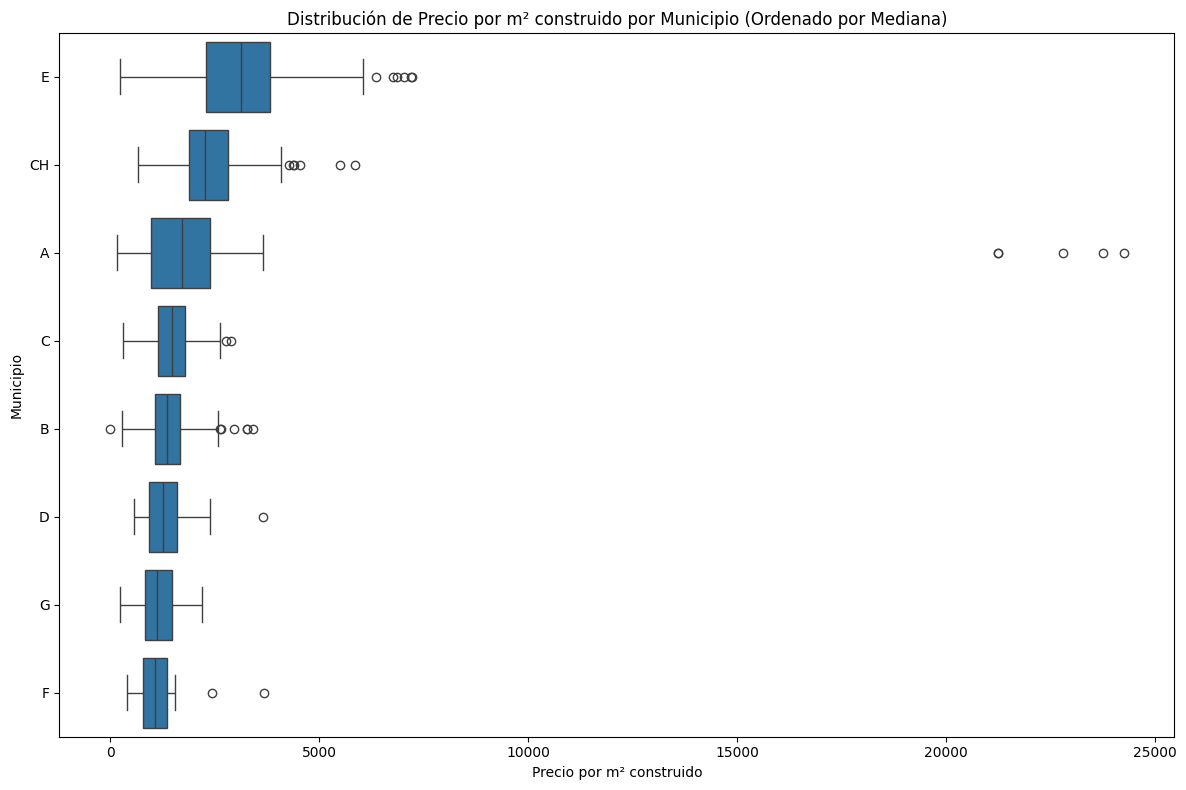

Medianas por municipio (ordenadas de mayor a menor):
municipio
E    3133
CH   2265
A    1722
C    1484
B    1364
D    1272
G    1121
F    1075
Name: precio_por_m2_construido, dtype: float64


In [47]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular la mediana por municipio para ordenar
mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

# Obtener el orden de los municipios (de mayor a menor mediana)
orden_municipios = mediana_por_municipio.index.tolist()

# Crear el boxplot con municipios ordenados en el eje Y por mediana
plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

# Añadir título y etiquetas
plt.title('Distribución de Precio por m² construido por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² construido')
plt.ylabel('Municipio')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar las medianas para verificar el orden
print("Medianas por municipio (ordenadas de mayor a menor):")
print(mediana_por_municipio)

In [48]:
# Filtrar solo el municipio A
df_municipio_a = df[df['municipio'] == 'A']

# Calcular Q1, Q3 e IQR para identificar outliers
Q1 = df_municipio_a['precio_por_m2_construido'].quantile(0.25)
Q3 = df_municipio_a['precio_por_m2_construido'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers (valores fuera de los límites)
outliers = df_municipio_a[
    (df_municipio_a['precio_por_m2_construido'] < lower_bound) | 
    (df_municipio_a['precio_por_m2_construido'] > upper_bound)
]

# Ordenar por precio_por_m2_construido de mayor a menor para ver los outliers superiores
outliers_sorted = outliers.sort_values('precio_por_m2_construido', ascending=False)

# Mostrar los 4 outliers principales
print(f"Total de outliers en municipio A: {len(outliers)}")
print("\nLos 4 outliers con mayor precio por m²:")
print(outliers_sorted[['url', 'precio_por_m2_construido', 'precio']].head(4))

# Si prefieres solo las URLs
print("\nURLs de los 4 outliers principales:")
for idx, url in enumerate(outliers_sorted['url'].head(4), 1):
    print(f"{idx}. {url}")

Total de outliers en municipio A: 5

Los 4 outliers con mayor precio por m²:
                                                                                              url  \
979  https://www.casasymas.com.uy/propiedad/137357-casa-de-tres-dormitorios-en-venta-en-prado-009   
936  https://www.casasymas.com.uy/propiedad/137356-casa-de-tres-dormitorios-en-venta-en-prado-010   
581  https://www.casasymas.com.uy/propiedad/137355-casa-de-tres-dormitorios-en-venta-en-prado-014   
566  https://www.casasymas.com.uy/propiedad/137351-casa-de-tres-dormitorios-en-venta-en-prado-005   

     precio_por_m2_construido  precio  
979                     24250  388000  
936                     23750  380000  
581                     22812  365000  
566                     21250  340000  

URLs de los 4 outliers principales:
1. https://www.casasymas.com.uy/propiedad/137357-casa-de-tres-dormitorios-en-venta-en-prado-009
2. https://www.casasymas.com.uy/propiedad/137356-casa-de-tres-dormitorios-en-venta-e

## Sacar Outliers dónde precio_por_m2_construido > 10,000

In [49]:
# Ver cuántas filas tienen precio_por_m2_construido > 10000
rows_to_remove = df[df['precio_por_m2_construido'] > 10000]
print(f"Filas a eliminar (precio_por_m2_construido > 10000): {len(rows_to_remove)}")

# Eliminar las filas donde precio_por_m2_construido > 10000
df = df[df['precio_por_m2_construido'] <= 10000]

print(f"Filas restantes después del filtrado: {len(df)}")

Filas a eliminar (precio_por_m2_construido > 10000): 5
Filas restantes después del filtrado: 917


## Sacar de nuevo el ranking para ver como quedo 

In [50]:
# Calcular el precio promedio por m2 construido por municipio
precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2': precio_promedio_por_m2_construido,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2
resultado_m2_municipio = resultado_m2_municipio.sort_values(by='precio_promedio_por_m2', ascending=False)

# Mostrar el resultado
print("Ranking de precio promedio por m² construido por municipio (actualizado):")
print(resultado_m2_municipio)

Ranking de precio promedio por m² construido por municipio (actualizado):
           precio_promedio_por_m2  cantidad_propiedades
municipio                                              
E                            3167                   350
CH                           2410                   186
A                            1670                    82
C                            1543                    87
B                            1448                   109
D                            1344                    32
G                            1195                    48
F                            1188                    23


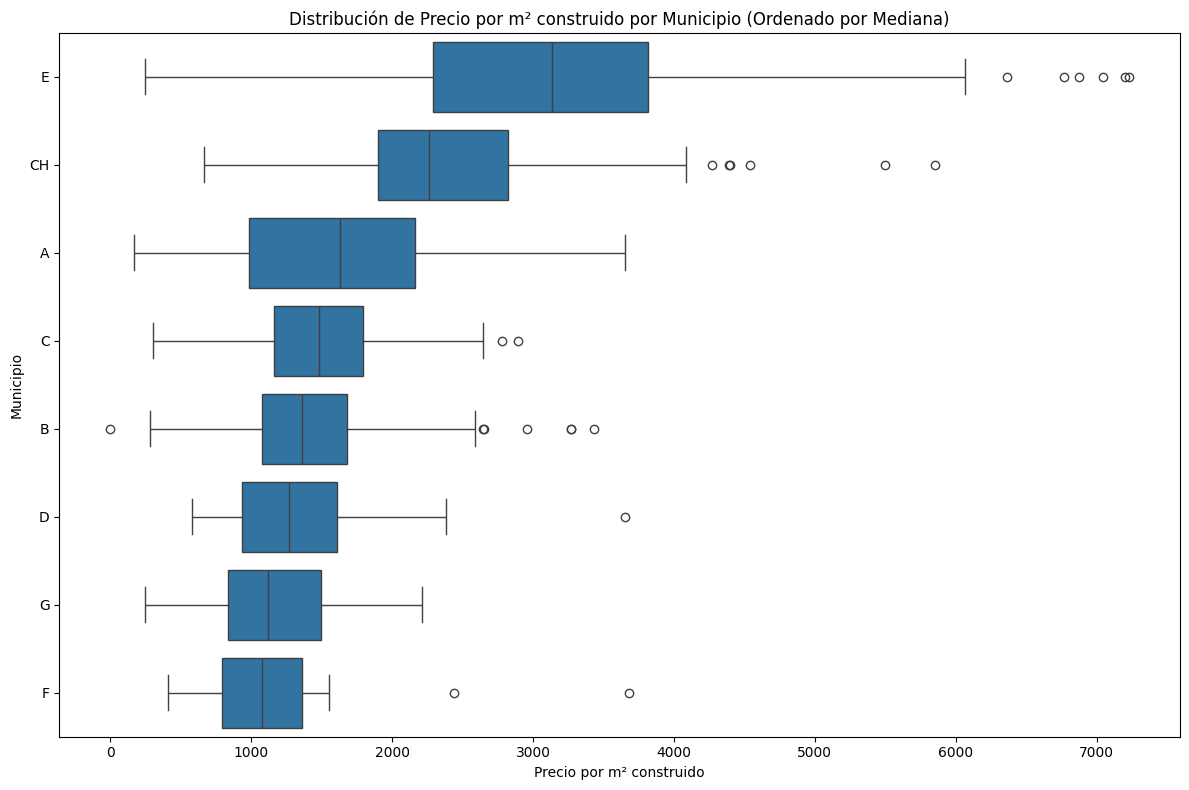

Medianas por municipio (ordenadas de mayor a menor):
municipio
E    3133
CH   2265
A    1631
C    1484
B    1364
D    1272
G    1121
F    1075
Name: precio_por_m2_construido, dtype: float64


In [51]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular la mediana por municipio para ordenar
mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

# Obtener el orden de los municipios (de mayor a menor mediana)
orden_municipios = mediana_por_municipio.index.tolist()

# Crear el boxplot con municipios ordenados en el eje Y por mediana
plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

# Añadir título y etiquetas
plt.title('Distribución de Precio por m² construido por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m² construido')
plt.ylabel('Municipio')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar las medianas para verificar el orden
print("Medianas por municipio (ordenadas de mayor a menor):")
print(mediana_por_municipio)

In [52]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por barrio
precio_promedio_por_m2_construido_barrios = df.groupby('barrio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_construido_barrios = precio_promedio_por_m2_construido_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por barrio
print(precio_promedio_por_m2_construido_barrios)

barrio
san-nicolas              5410
carrasco                 3422
carrasco-norte           3151
villa-dolores            2951
punta-carretas           2741
punta-gorda              2630
parque-batlle            2546
pocitos                  2543
buceo                    2411
malvin                   2320
prado                    2198
parque-rivera            2132
barrio-sur               1976
la-blanqueada            1947
atahualpa                1921
parque-rodo              1835
brazo-oriental           1770
tres-cruces              1690
malvin-norte             1643
capurro                  1629
jacinto-vera             1592
cordon                   1591
victoria                 1534
punta-rieles             1524
maronas                  1515
las-acacias              1490
palermo                  1489
mercado-modelo           1484
perez-castellanos        1483
larranaga                1474
cerrito                  1471
la-teja                  1464
union                    1450
la-

## Export dataset

In [53]:
df.to_excel('datasets/final_dataset_2025-09-08.xlsx', index=False)